In [23]:
using Plots, Distributions


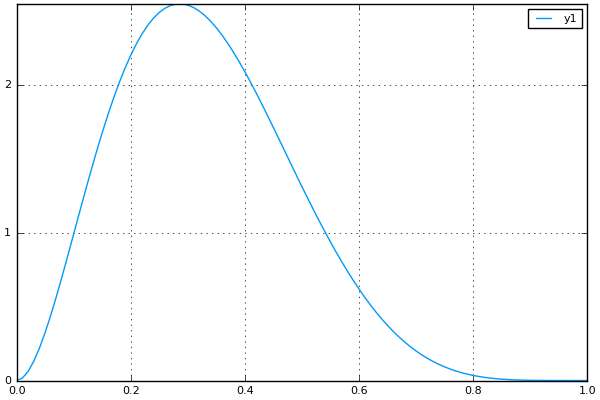

In [24]:
srand(1)
prior(x) = pdf(Beta(3,6),x)
plot(0:0.01:1, prior)

In [25]:
phi(k, ts) = -cos.(ts*sqrt(k))

phi (generic function with 1 method)

In [106]:
data = Dict(20=>.4)

Dict{Int64,Float64} with 1 entry:
  20 => 0.4


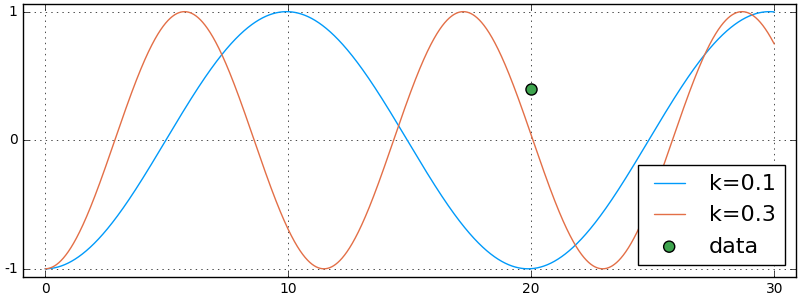

In [118]:
traj = plot(0:0.01:30, [t->phi(k,t) for k=[0.1,0.3]], labels=["k=0.1" "k=0.3"])
tp = scatter!(traj, collect(keys(data)), values(data) |> collect, labels="data", m=8, legendfont=font(16), tickfont=font(10), size=(800,300)) |> display
savefig("traj.pdf")


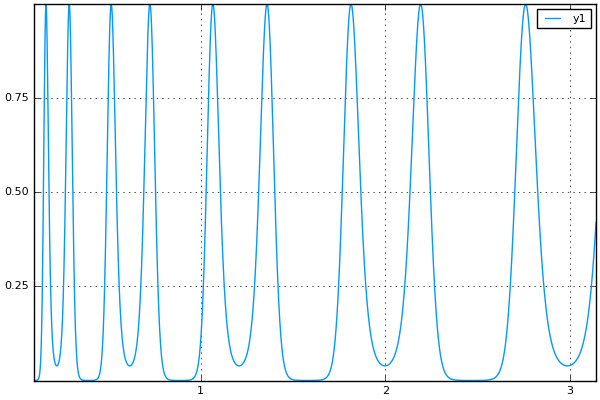

In [34]:
sigma = 0.3
likelihood(x) = exp(-norm([phi(x,t) - y for (t,y) in data])^2 / 2 / sigma^2)
plot(0.1:0.001:1*pi, x->likelihood(x))

In [35]:
posterior(x) = likelihood(x) * prior(x)

posterior (generic function with 1 method)

35


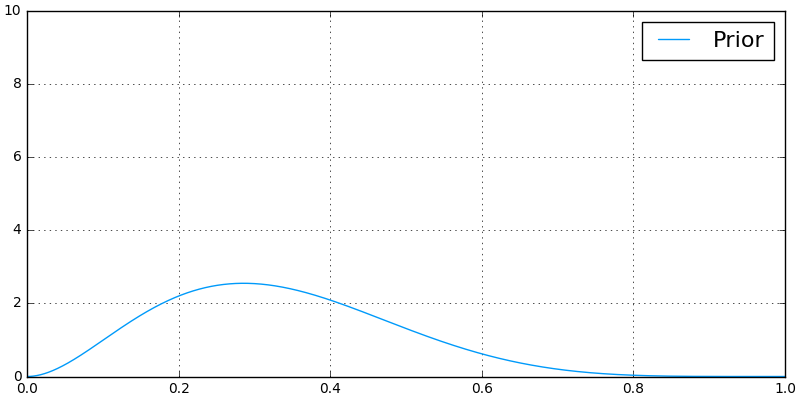


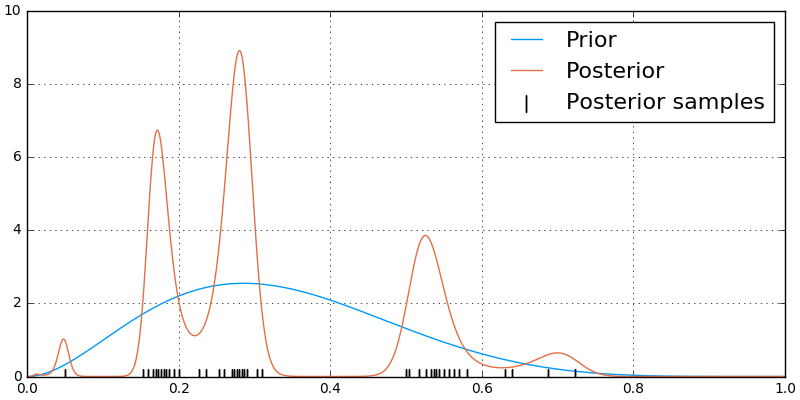

In [136]:
samples = Float64[]

xs = 0:5/1500:5

pmax = maximum(posterior.(xs))
for x in xs
    rand() < posterior(x) / pmax && push!(samples, x)
end
length(samples) |> display

n = 1000
xs = 0:1/n:1

po = posterior.(xs)
po = po/sum(po) * n 

plot(xs, prior, label="Prior", legendfont=font(16), tickfont=font(10), ylims=(0,10), xlims=(0,1), size=(800,400)) |> display
savefig("prior.pdf")
plot!(xs,po, label="Posterior")
scatter!(samples, zero(samples), m=:vline, ms=12, label="Posterior samples") |> display
savefig("posterior.pdf")
